# Import Packages

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon

from utils_file.tools import load_cache_file, rank_finder

warnings.filterwarnings("ignore")
path = "figure_file"

# Load Data

In [2]:
dqn_result = load_cache_file("pre-train-fixWindow/test_result_119.pkl")
dqn_result_reward = list(dqn_result["reward_result"].values())

In [3]:
stable_pairs = load_cache_file("data_file/static_strategy/ap_reward_result_test.pkl")

In [6]:
stable_pairs_table = pd.DataFrame(stable_pairs).T
stable_pairs_table.columns = stable_pairs_table.columns + 1
stable_pairs_table_temp = stable_pairs_table.copy()
stable_pairs_table_temp.columns = [f"state_{x}" for x in range(1, 37)]
stable_pairs_mean = stable_pairs_table.mean(axis=0)

In [8]:
above_median_x, above_median_y = [], []
below_median_x, below_median_y = [], []

for x, y in enumerate(stable_pairs_table.median()):
    value = dqn_result_reward[x]

    if value > y:
        above_median_x.append(x + 1)
        above_median_y.append(value)

    else:
        below_median_x.append(x + 1)
        below_median_y.append(value)

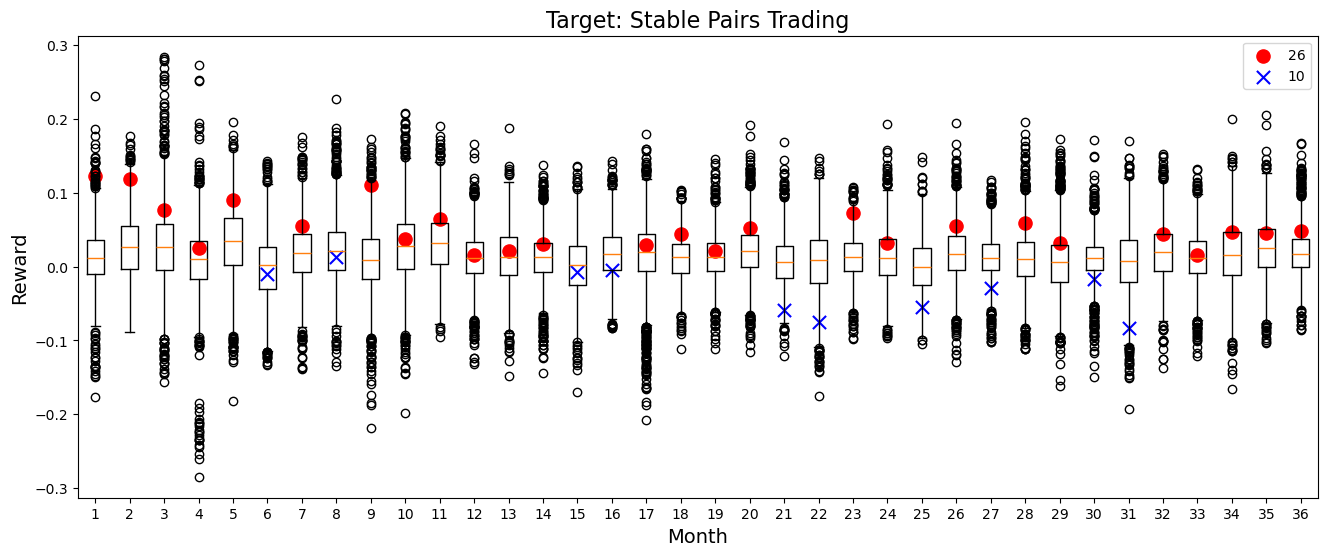

In [18]:
plt.figure(figsize=(16, 6))
plt.boxplot(stable_pairs_table)
plt.scatter(
    above_median_x,
    above_median_y,
    s=90,
    color="red",
    marker="o",
    label=f"{len(above_median_x)}",
)
plt.scatter(
    below_median_x,
    below_median_y,
    s=90,
    color="blue",
    marker="x",
    label=f"{len(below_median_x)}",
)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Reward", fontsize=14)
plt.legend()
plt.title("Target: Stable Pairs Trading", fontsize=16)
plt.show()

In [10]:
dqn_result_rank = rank_finder(dqn_result_reward, stable_pairs_table_temp)

stable_pairs_mean = stable_pairs_table_temp.mean()
stable_pairs_mean_rank = rank_finder(stable_pairs_mean, stable_pairs_table_temp)

WRS = wilcoxon(dqn_result_rank, stable_pairs_mean_rank, alternative="less")
print(f"p-value of WRS: {WRS[1]: .4f}")

p-value of WRS:  0.0258


[]

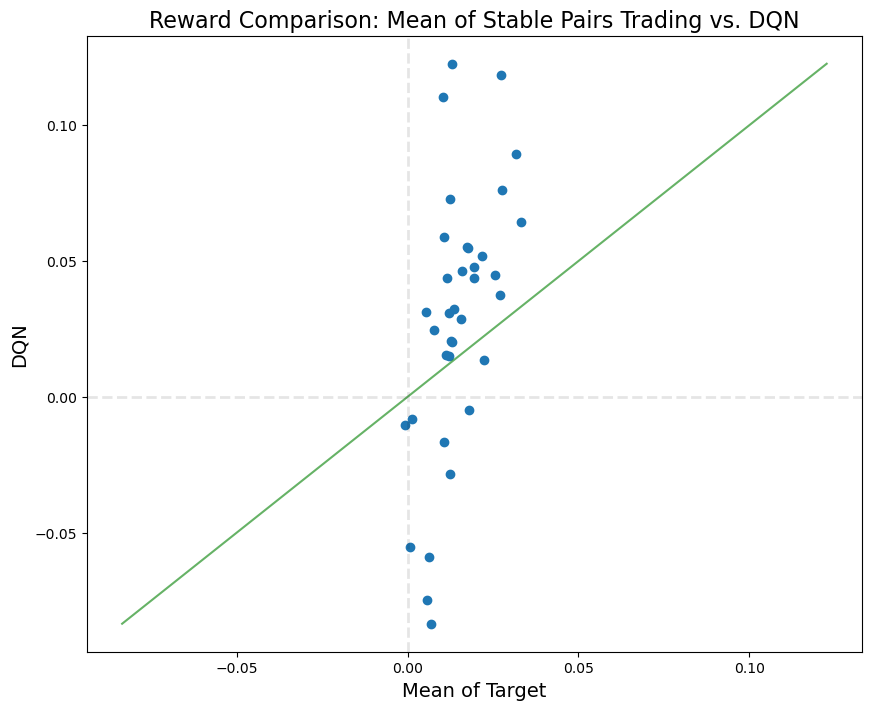

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(stable_pairs_mean, dqn_result_reward)
plt.plot(
    np.linspace(
        min(min(stable_pairs_mean), min(dqn_result_reward)),
        max(max(stable_pairs_mean), max(dqn_result_reward)),
        200,
    ),
    np.linspace(
        min(min(stable_pairs_mean), min(dqn_result_reward)),
        max(max(stable_pairs_mean), max(dqn_result_reward)),
        200,
    ),
    color="green",
    alpha=0.6,
)
plt.axhline(y=0, color="black", linestyle="--", linewidth=2, alpha=0.1)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2, alpha=0.1)
plt.xlabel("Mean of Target", fontsize=14)
plt.ylabel("DQN", fontsize=14)
plt.title("Reward Comparison: Mean of Stable Pairs Trading vs. DQN", fontsize=16)
plt.plot()

In [14]:
dqn_result_cum_reward = []

for i in range(len(dqn_result_reward)):
    dqn_result_cum_reward.append(sum(dqn_result_reward[: i + 1]))

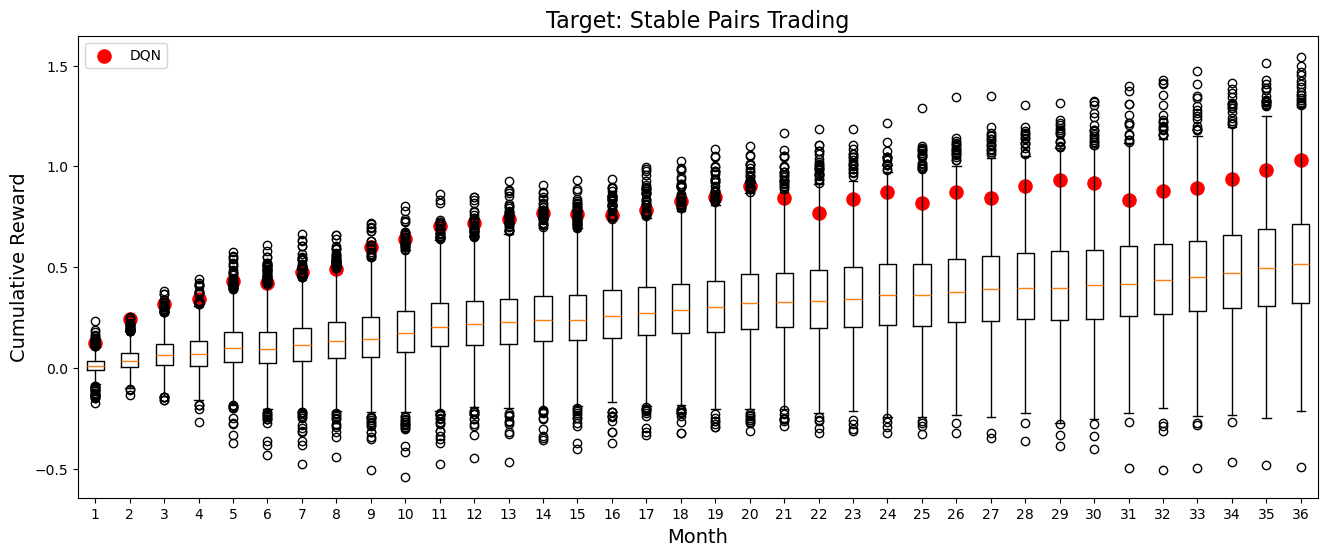

In [17]:
plt.figure(figsize=(16, 6))
plt.boxplot(stable_pairs_table.cumsum(axis=1))
plt.scatter(
    range(1, len(dqn_result_cum_reward) + 1),
    dqn_result_cum_reward,
    s=90,
    color="red",
    marker="o",
    label="DQN",
)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Cumulative Reward", fontsize=14)
plt.legend()
plt.title("Target: Stable Pairs Trading", fontsize=16)
plt.show()